# 0. Importamos librerías

In [1]:
#Librerias generales
import pandas as pd 
import numpy as np
import skimpy as sk
import random
from datetime import datetime, timezone, time, timedelta, date
import holidays
from scipy.stats import shapiro
import scipy.stats as stats
import matplotlib.pyplot as plt


#Visualización
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
from matplotlib.colors import ListedColormap
#sns.set_style('whitegrid') 

# Definir la paleta de colores
cmap = sns.color_palette(["#ffb534", "#fbf6ee", "#c1f2b0", "#65b741"])

# 1. Análisis exploratorio de los datos

In [2]:
df= pd.read_csv(r"C:\Users\alici\Documents\master_data_science\proyecto_nuclio\TFM\datos_arreglados.csv",index_col=0, sep=',')

## 1.1. Análisis general

Realizamos un análisis general, con una manipulación completa previa en la parte de preprocesamiento de los datos.

In [3]:
df.head()

,date,item,category,department,stores,region,week,year,is_holidays,units_sold,sell_price,total_sales
0,2013-07-08,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End(BOS_1),Boston,28,2013,0,0,12.7414,0.0000
1,2013-07-15,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End(BOS_1),Boston,28,2013,1,0,12.7414,0.0000
2,2013-07-22,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End(BOS_1),Boston,29,2013,0,4,10.9858,43.9432
3,2013-07-29,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End(BOS_1),Boston,30,2013,0,6,10.9858,65.9148
4,2013-08-05,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End(BOS_1),Boston,31,2013,0,0,10.9858,0.0000


In [4]:
df.tail()

,date,item,category,department,stores,region,week,year,is_holidays,units_sold,sell_price,total_sales
6610508,2016-03-28,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village(PHI_3),Philadelphia,12,2016,1,22,1.2,26.4
6610509,2016-04-04,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village(PHI_3),Philadelphia,13,2016,0,17,1.2,20.4
6610510,2016-04-11,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village(PHI_3),Philadelphia,14,2016,0,6,1.2,7.2
6610511,2016-04-18,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village(PHI_3),Philadelphia,15,2016,0,0,1.2,0.0
6610512,2016-04-25,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village(PHI_3),Philadelphia,16,2016,0,0,1.2,0.0


In [5]:
df.columns

Index(['date', 'item', 'category', 'department', 'stores', 'region', 'week',
       'year', 'is_holidays', 'units_sold', 'sell_price', 'total_sales'],
      dtype='object')

Analizamos las columnas de nuestro dataframe:


| **Columna** | **Significado**    |
|:-----       | :---               |
|date         |   Fecha de los días en formato (year-month-day)    |
|item      |    Código que identifica el artículo vendido. Se compone de categoría + departamento +código artículo       |
|category  |  SUPERMARKET,  HOME_&_GARDEN  y ACCESORIES , las tres categorías distintas que existen  |
|department            |   Por cada categoría anterior hay 3 departamentos     |
|stores        |  Existen las siguientes tiendas: Greenwich_Village, Harlem, Tribeca, Brooklyn, South_End, Roxbury, Back_bay, Midtown_Village, Yorktown y Queen_Village |
|region         |   Pertenecen a las 3 distintas ciudades, New York, Boston y Philadelphia    |
|week      |    Semana del año      |
|year  |  Año correspondiente |
|is_holidays            |   Si corresponde a un día de fiesta o no             |
|units_sold        |  Numero de ventas efectuada por observación    |
|sell_price        |  Precio de venta de los artículos   |
|total_sales         |   Total de las ventas |


In [6]:
# Analizamos el tipo de cada columna
df.dtypes

date            object
item            object
category        object
department      object
stores          object
region          object
week             int64
year             int64
is_holidays      int64
units_sold       int64
sell_price     float64
total_sales    float64
dtype: object

In [7]:
df["date"]= pd.to_datetime(df["date"])
df = df.set_index("date")

In [8]:
# Análisis general de todas las variables, y el rango de fechas
sk.skim(df)

NameError: name 'sk' is not defined

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
week,6610513.0,25.828366,15.230914,1.000,12.0000,25.000,39.0000,52.0000
year,6610513.0,2013.544410,1.474738,2011.000,2012.0000,2014.000,2015.0000,2016.0000
is_holidays,6610513.0,0.253561,0.435049,0.000,0.0000,0.000,1.0000,1.0000
units_sold,6610513.0,9.883915,26.184034,0.000,1.0000,3.000,10.0000,4220.0000
sell_price,6610513.0,5.515011,4.382849,0.012,2.6201,4.200,7.1760,134.1500
total_sales,6610513.0,34.733862,76.647744,0.000,1.1760,14.925,38.5434,7549.1598


In [10]:
df.isnull().sum()

item           0
category       0
department     0
stores         0
region         0
week           0
year           0
is_holidays    0
units_sold     0
sell_price     0
total_sales    0
dtype: int64

## 1.2. Análisis exploratorio univariante

Vamos a realizar un análisis univariante tanto de las variables categóricas como de las numéricas.

In [11]:
# Separamos las variables numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])
# Separamos las variables categóricas
df_categorical = df.select_dtypes(include=['object'])

In [12]:
print("Columnas numéricas:")
for column in df_numeric.columns:
    print(f" - {column}")

print("\nColumnas categóricas:")
for column in df_categorical.columns:
    print(f" - {column}")

Columnas numéricas:
 - week
 - year
 - is_holidays
 - units_sold
 - sell_price
 - total_sales

Columnas categóricas:
 - item
 - category
 - department
 - stores
 - region


Empezaremos con las columnas numéricas, en el orden listado, por lo que la primera variable explorada será *week* (semana).

## Columnas numéricas

### Week


In [13]:
total_weeks= df['week'].nunique()
print(f'Hay {total_weeks} de semanas')

Hay 52 de semanas


In [14]:
# Agrupa los datos por semana y suma los valores
df_semanal = df.resample('W').sum()

# Ahora puedes calcular la suma de todas las semanas
total_semanas = df_semanal['week'].sum()
print(f'La suma de todas las semanas es {total_semanas}')

La suma de todas las semanas es 170738747


### Year

In [15]:
total_years= df['year'].nunique()
print(f'Hay un total de {total_years} años')

Hay un total de 6 años


### Holidays

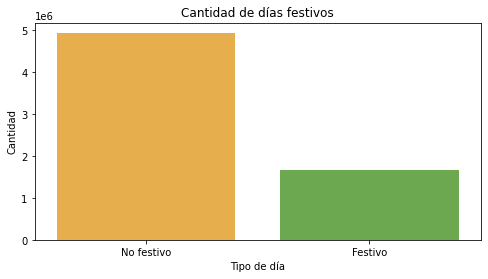

In [75]:
# Obtenemos el conteo de festivos y no festivos
holiday_counts = df['is_holidays'].value_counts()

# Visualizamos los datos mediante un gráfico de barras
plt.figure(figsize=(8,4))
sns.barplot(x=holiday_counts.index, y=holiday_counts.values, palette=["#ffb534", "#65b741"])
plt.title('Cantidad de días festivos')
plt.xlabel('Tipo de día')
plt.ylabel('Cantidad')
plt.xticks([0,1], ['No festivo', 'Festivo'], rotation=0)
plt.show()


Observamos que tenemos una cantidad bastante elevada de días festivos.


In [18]:
holiday_freq = df['is_holidays'].value_counts()

print(holiday_freq)

0    4934343
1    1676170
Name: is_holidays, dtype: int64


### Units sold

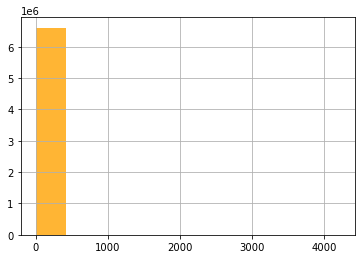

In [19]:
df['units_sold'].hist(color="#ffb534"); 

Observamos que la escala es demasiado grande.

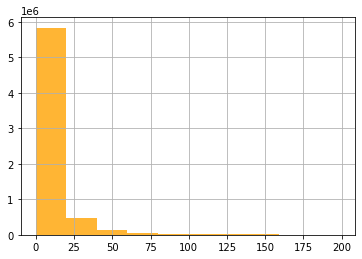

In [20]:
# Analizamos las unidades vendidas por debajo de 200
df[df['units_sold'] < 200]['units_sold'].hist(color="#ffb534");

### Sell price

In [21]:
max_price = df['sell_price'].max()
min_price = df['sell_price'].min()

print(f'El precio de venta máximo es: {max_price}')
print(f'El precio de venta mínimo es: {min_price}')

El precio de venta máximo es: 134.14999999999998
El precio de venta mínimo es: 0.012


Podemos ver una gran discrepancia entre el precio más alto y el más bajo.

In [22]:
df.sell_price.value_counts()

2.3760     210293
3.5760     204952
3.0000     179634
1.2000     143259
4.7760     134873
            ...  
1.3625          1
14.0448         1
20.0564         1
14.8162         1
16.5125         1
Name: sell_price, Length: 1855, dtype: int64

In [23]:
num_unique_prices = df['sell_price'].nunique()

print(f'Hay {num_unique_prices} precios de venta únicos.')

Hay 1855 precios de venta únicos.


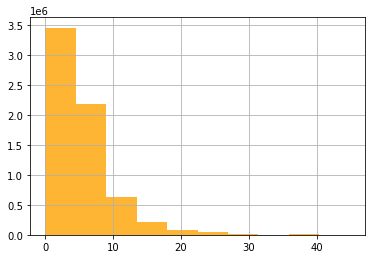

In [24]:
# Observamos los precios inferiores a 50
df[df['sell_price'] < 50]['sell_price'].hist(color="#ffb534");

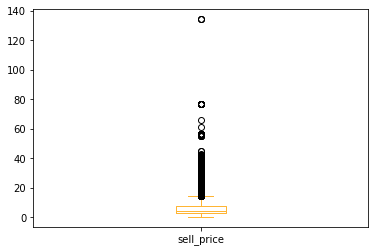

In [25]:
df['sell_price'].plot(kind='box', color="#ffb534");

Vemos una gran cantidad de *outliers* en el precio medio de venta.

In [26]:
df_sorted = df.sort_values('sell_price')

cheapest_10 = df_sorted.head(10)
most_expensive_10 = df_sorted.tail(10)

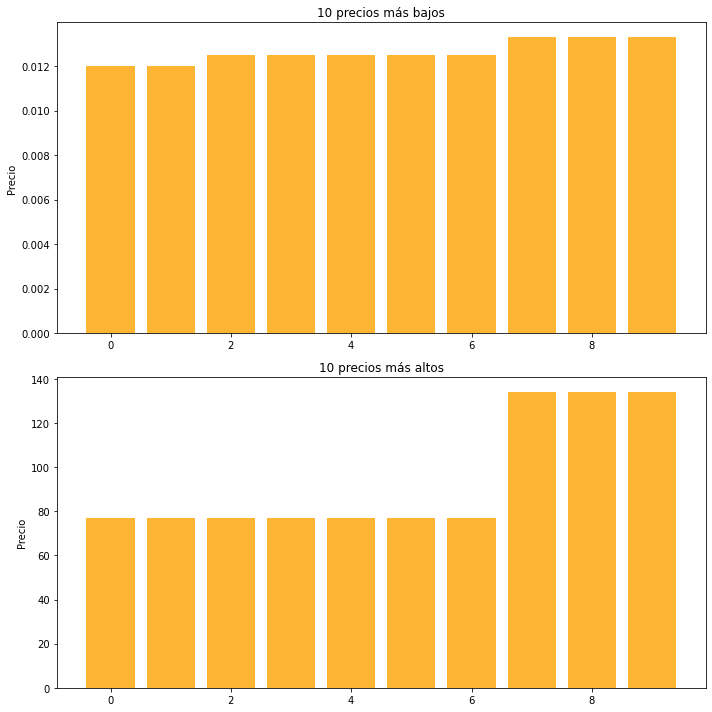

In [32]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10), )

ax[0].bar(range(10), cheapest_10['sell_price'], color='#ffb534')  # Asume que 'sell_price' es el nombre de la columna de precios
ax[0].set_title('10 precios más bajos')
ax[0].set_ylabel('Precio')

ax[1].bar(range(10), most_expensive_10['sell_price'], color='#ffb534')  # Asume que 'sell_price' es el nombre de la columna de precios
ax[1].set_title('10 precios más altos')
ax[1].set_ylabel('Precio')

plt.tight_layout()
plt.show()

### Ítem

In [28]:
item_counts = df['item'].value_counts()
print(item_counts)

HOME_&_GARDEN_1_344    2740
HOME_&_GARDEN_2_299    2740
SUPERMARKET_1_046      2740
SUPERMARKET_3_727      2740
SUPERMARKET_3_020      2740
                       ... 
HOME_&_GARDEN_1_308     571
HOME_&_GARDEN_1_159     553
HOME_&_GARDEN_1_242     530
SUPERMARKET_3_296       517
SUPERMARKET_2_379       460
Name: item, Length: 3049, dtype: int64


In [29]:
num_unique_items = df['item'].nunique()
print(f'Hay {num_unique_items} ítems diferentes.')

Hay 3049 ítems diferentes.


<ipython-input-30-9164ac5bf7f2>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(top_10.index, rotation=45, horizontalalignment='right')
<ipython-input-30-9164ac5bf7f2>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(less_10.index, rotation=45, horizontalalignment='right')


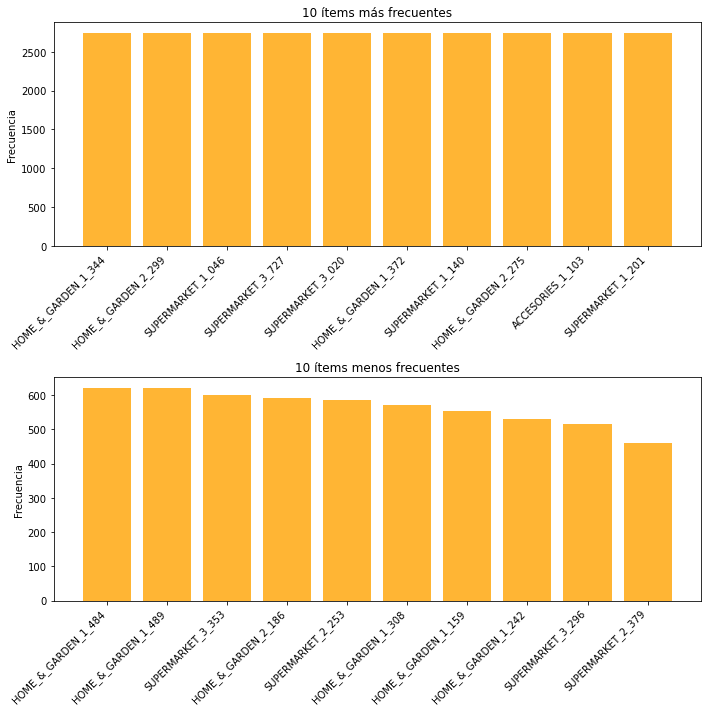

In [30]:
item_counts = df['item'].value_counts()

top_10 = item_counts.head(10)
less_10 = item_counts.tail(10)

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

ax[0].bar(top_10.index, top_10,  color='#ffb534')
ax[0].set_title('10 ítems más frecuentes')
ax[0].set_ylabel('Frecuencia')
ax[0].set_xticklabels(top_10.index, rotation=45, horizontalalignment='right')

ax[1].bar(less_10.index, less_10,  color='#ffb534')
ax[1].set_title('10 ítems menos frecuentes')
ax[1].set_ylabel('Frecuencia')
ax[1].set_xticklabels(less_10.index, rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show();

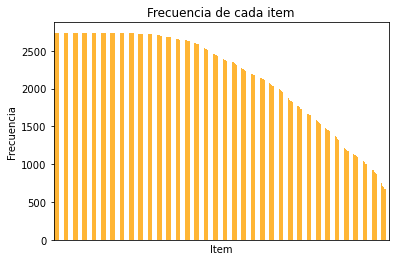

In [33]:
df['item'].value_counts().plot(kind='bar', color='#ffb534')
plt.xlabel('Item')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de cada item')
plt.xticks([])  # Configura las etiquetas del eje x a una lista vacía
plt.show()

## Columnas categóricas

### Category

In [34]:
freq_distribution = df['category'].value_counts()
print("Distribución de frecuencia de 'category':\n", freq_distribution)

Distribución de frecuencia de 'category':
 SUPERMARKET      3073307
HOME_&_GARDEN    2295918
ACCESORIES       1241288
Name: category, dtype: int64


La mayor cantidad de ítems pertenecen a *supermarket*.

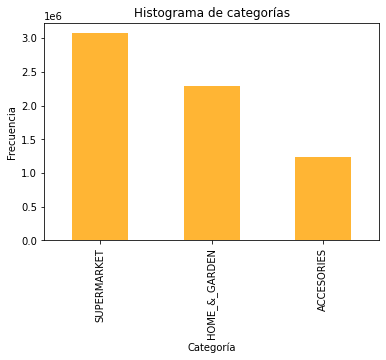

In [35]:
df['category'].value_counts().plot(kind='bar', color= "#ffb534")

plt.title('Histograma de categorías')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show();

Vemos una clara preferencia de la categoría *supermarket*.

### Department

In [36]:
freq_distribution = df['department'].value_counts()
print("Distribución de frecuencia de 'department':\n", freq_distribution)

Distribución de frecuencia de 'department':
 SUPERMARKET_3      1773017
HOME_&_GARDEN_2    1175615
HOME_&_GARDEN_1    1120303
ACCESORIES_1        928899
SUPERMARKET_2       793587
SUPERMARKET_1       506703
ACCESORIES_2        312389
Name: department, dtype: int64


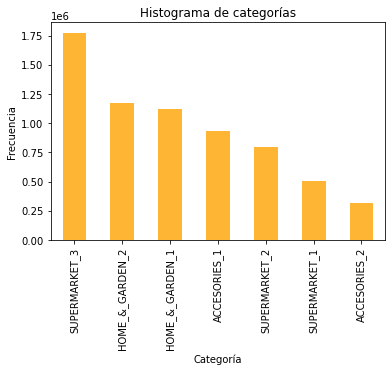

In [37]:
df['department'].value_counts().plot(kind='bar', color = "#ffb534")

plt.title('Histograma de categorías')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show();

Vemos que la mayoría de las ventas ocurren en el *departamento 3* de *supermarket.*

### Stores

In [38]:
num_unique_stores = df['stores'].nunique()

print(f'Hay {num_unique_stores} tiendas únicas.')

Hay 10 tiendas únicas.


In [39]:
freq_distribution = df['stores'].value_counts()
print("Distribución de frecuencia de 'category':\n", freq_distribution)

Distribución de frecuencia de 'category':
 Roxbury(BOS_2)              678037
South_End(BOS_1)            676632
Greenwich_Village(NYC_1)    675255
Queen_Village(PHI_3)        672947
Tribeca(NYC_3)              670857
Back_Bay(BOS_3)             667996
Brooklyn(NYC_4)             655964
Yorktown(PHI_2)             655279
Midtown_Village(PHI_1)      643080
Harlem(NYC_2)               614466
Name: stores, dtype: int64


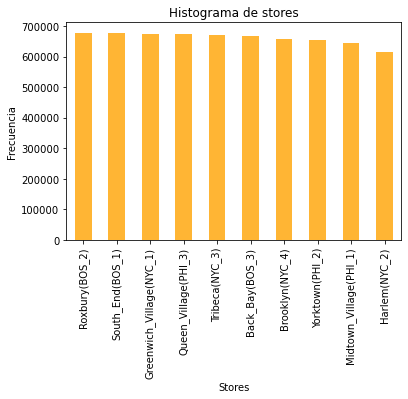

In [40]:
df['stores'].value_counts().plot(kind='bar', color= "#ffb534")

plt.title('Histograma de stores')
plt.xlabel('Stores')
plt.ylabel('Frecuencia')
plt.show();

*Roxbury* en Boston se posiciona como la tienda en la que más ventas se producen, mientras que *Harlem* en New York se encuentra en el puesto más bajo.

### Region

In [41]:
estados = df['region'].unique()
for estado in estados:
    print(estado)

Boston
New York
Philadelphia


In [42]:
frecuencia_estados = df['region'].value_counts()
print(frecuencia_estados)

New York        2616542
Boston          2022665
Philadelphia    1971306
Name: region, dtype: int64


In [43]:
region_mas_comun = df['region'].mode()[0]
print(f'La región más común es {region_mas_comun}')

La región más común es New York


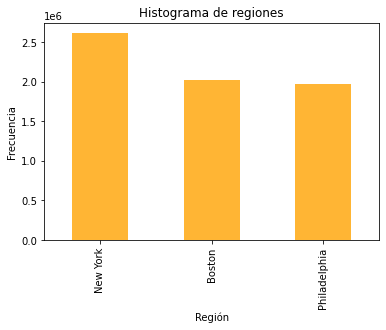

In [44]:
df['region'].value_counts().plot(kind='bar', color = "#ffb534")

plt.title('Histograma de regiones')
plt.xlabel('Región')
plt.ylabel('Frecuencia')
plt.show();

## 1.3. Análisis exploratorio bivariante

Vamos a analizar la correlación entre las variables numéricas del dataframe.

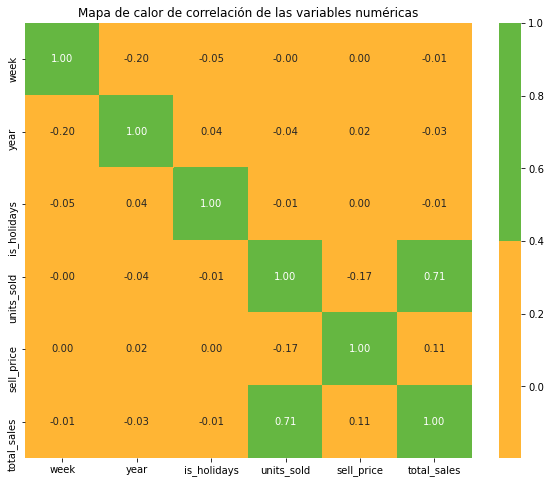

In [45]:
df_numerico = df.select_dtypes(include=[np.number])
corr = df_numerico.corr()

# Definir los colores personalizados
colors = ["#ffb534", "#65b741"]
mi_cmap = ListedColormap(colors)

# Crear el mapa de calor con anotaciones de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap=mi_cmap, annot=True, fmt=".2f")
plt.title('Mapa de calor de correlación de las variables numéricas')
plt.show()


No observamos ninguna relación importante, excepto *units_sold* con *total_sales.* Relación con sentido ya que la cantidad de unidades con el total de la venta mantiene cierta unión.

## Relación con *total_sales*

### Week

Queremos comprobar la relación de algunas variables con las ventas totales, empezaremos con la variable *week.*

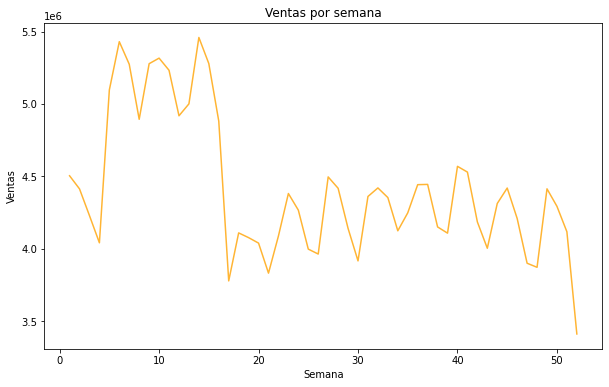

In [48]:
week_sales= df.groupby('week')['total_sales'].sum()
plt.figure(figsize=(10,6),)
plt.plot(week_sales.index, week_sales.values ,color="#ffb534")  # Cambiar el color de la línea
plt.xlabel('Semana')
plt.ylabel('Ventas')
plt.title('Ventas por semana')
plt.show()

Vemos que el inicio del año, tiene más ventas que el resto del año, revisaremos las semanas que más ventas tienen.

In [49]:
top_week_sales = week_sales.nlargest(15)
print(top_week_sales)

week
14    5.458961e+06
6     5.429849e+06
10    5.316178e+06
15    5.278428e+06
9     5.277710e+06
7     5.273897e+06
11    5.232282e+06
5     5.096755e+06
13    5.000255e+06
12    4.917894e+06
8     4.893679e+06
16    4.881399e+06
40    4.568574e+06
41    4.528890e+06
1     4.503511e+06
Name: total_sales, dtype: float64


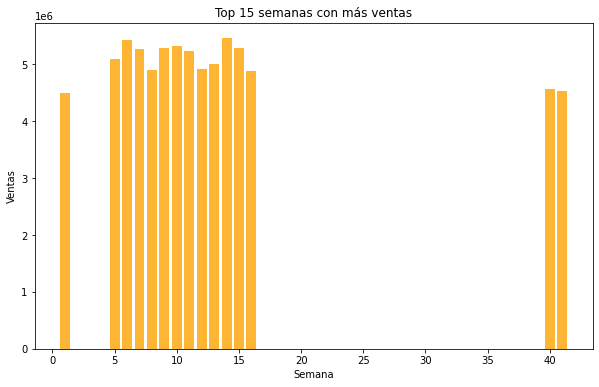

In [50]:
plt.figure(figsize=(10,6))
plt.bar(top_week_sales.index, top_week_sales.values, color="#ffb534")
plt.xlabel('Semana')
plt.ylabel('Ventas')
plt.title('Top 15 semanas con más ventas')
plt.show();

Las semanas con más ventas corresponden a los meses de febrero y marzo.

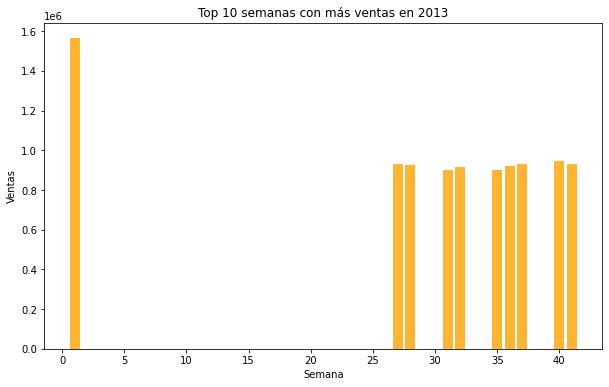

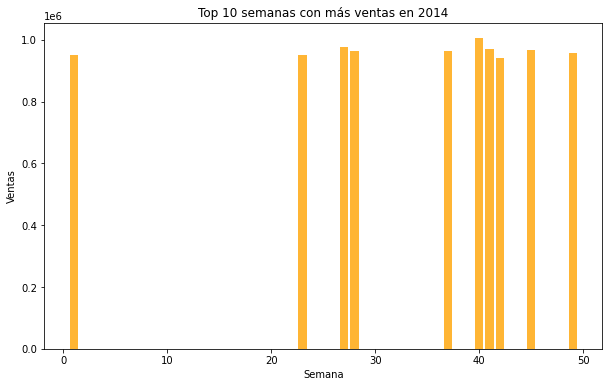

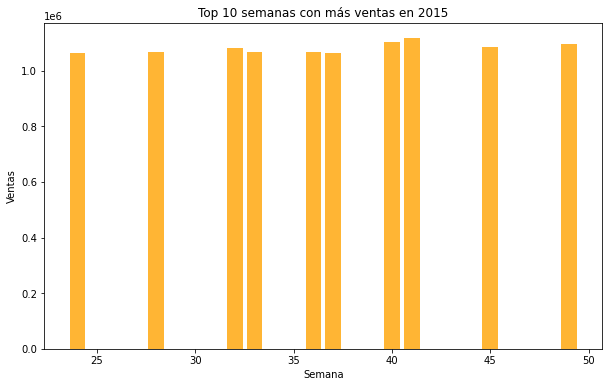

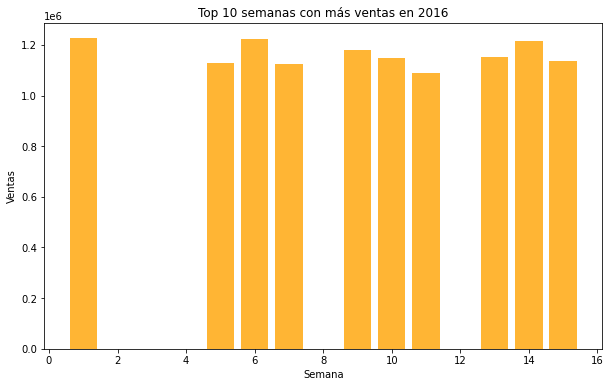

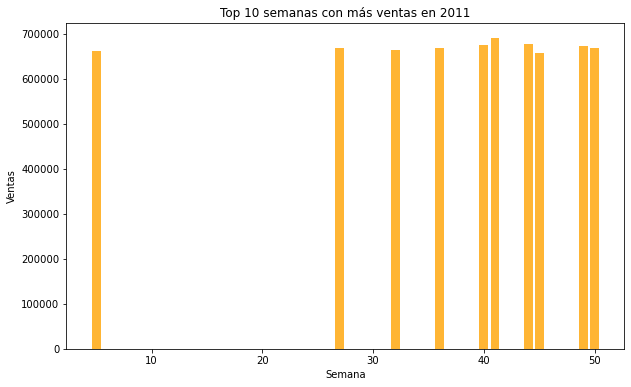

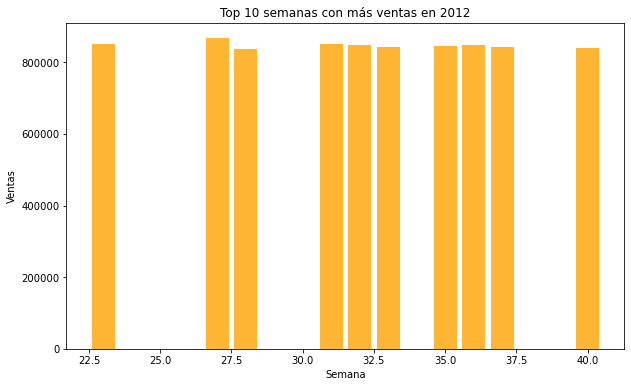

In [51]:
years = df['year'].unique()

for year in years:
    df_year = df[df['year'] == year]
    sales_per_week = df_year.groupby('week')['total_sales'].sum()
    top_sales_per_week = sales_per_week.nlargest(10)

    plt.figure(figsize=(10,6))
    plt.bar(top_sales_per_week.index, top_sales_per_week.values, color="#ffb534")
    plt.xlabel('Semana')
    plt.ylabel('Ventas')
    plt.title(f'Top 10 semanas con más ventas en {year}')
    plt.show();

Vemos que si separamos por años se diversifican las semanas con más ventas. No se concentra en el primer cuatrimestre del año.

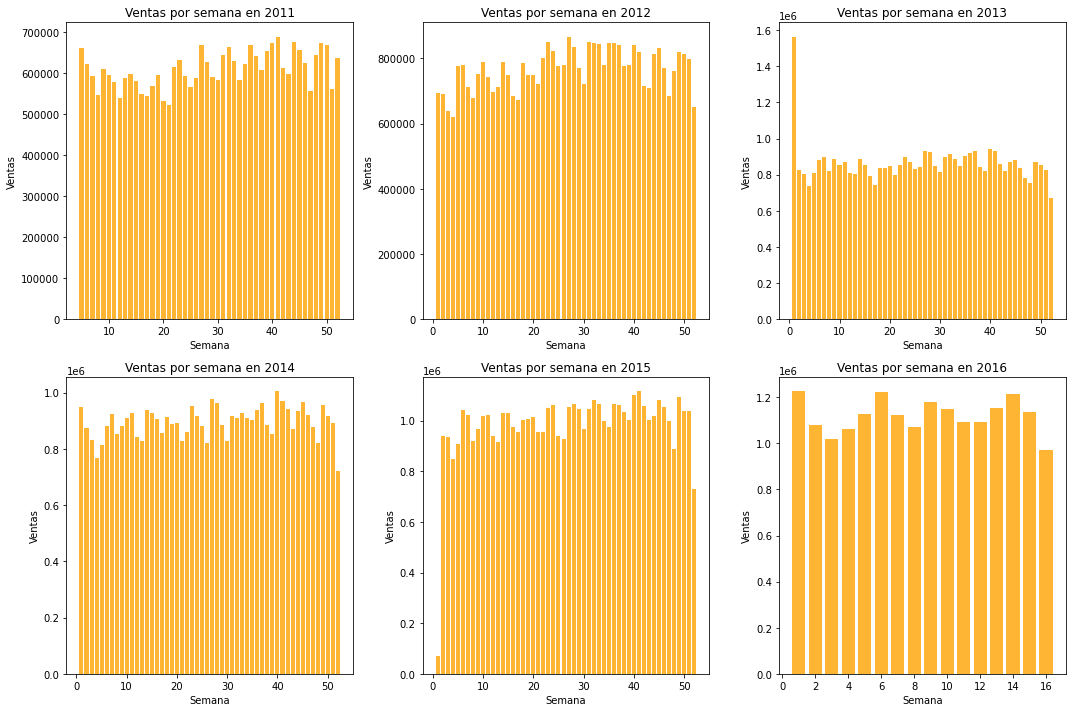

In [117]:
years = sorted(df['year'].unique())

# Definimos el número de columnas para los subplots
num_plots = len(years)

# Calculamos el número de filas y columnas para los subplots
num_cols = 3
num_rows = -(-num_plots // num_cols)  

# Crear la figura y los subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Iteramos sobre cada año y trazar el gráfico correspondiente en el subplot adecuado
for i, year in enumerate(years):
    df_year = df[df['year'] == year]
    sales_per_week = df_year.groupby('week')['total_sales'].sum()

    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    ax.bar(sales_per_week.index, sales_per_week.values, color="#ffb534")
    ax.set_xlabel('Semana')
    ax.set_ylabel('Ventas')
    ax.set_title(f'Ventas por semana en {year}')

# Eliminamos subplots no utilizados
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

Tal y como vemos al desplegarlo por años, el Q1 no es el más abundante. También observamos que el año 2016 solo tiene datos de este Q por lo que modifica los totales.
Veremos el ranking de semanas con más ventas sin tener en cuenta el año 2016.

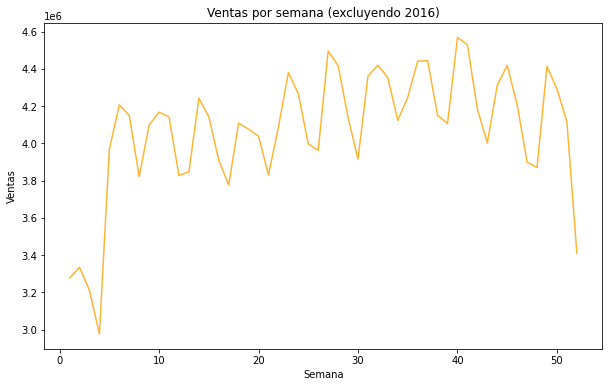

In [53]:
df_filtered = df[df['year'] != 2016]

week_sales = df_filtered.groupby('week')['total_sales'].sum()
plt.figure(figsize=(10,6))
plt.plot(week_sales.index, week_sales.values, color="#ffb534")
plt.xlabel('Semana')
plt.ylabel('Ventas')
plt.title('Ventas por semana (excluyendo 2016)')
plt.show()

Hay más prevalencia en el último Q que en el primero.

### Year

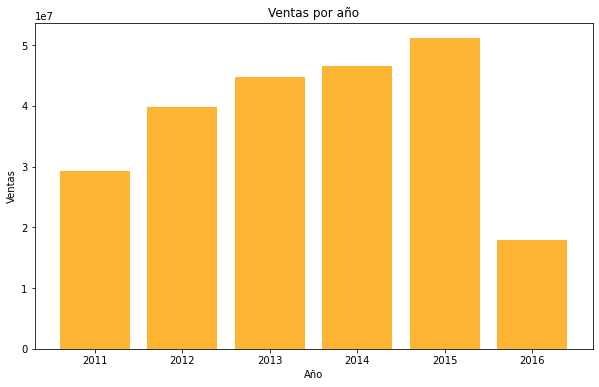

In [119]:
year_sales= df.groupby('year')['total_sales'].sum()
plt.figure(figsize=(10,6))
plt.bar(year_sales.index, year_sales.values, color="#ffb534")
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.title('Ventas por año')
plt.show()

Tenemos datos del 2011 al 2016. Este último no acabado por lo que serían datos del año actual. Vemos que la ventas se van incrementando año tras año.

In [55]:
years = df.index.year.unique()

for year in years:
    df_year = df[df.index.year == year]
    sales_per_year = df_year['total_sales'].sum()
    print(f'Ventas en {year}: {sales_per_year}')

Ventas en 2013: 44091499.958299994
Ventas en 2014: 46429053.42759997
Ventas en 2015: 51994110.4217
Ventas en 2016: 17919419.132999998
Ventas en 2011: 28671346.412899997
Ventas en 2012: 40503219.58110001


Vemos la distribución de los años por su Q.

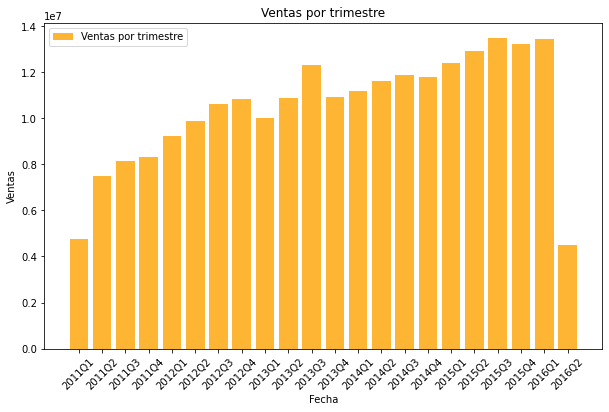

In [56]:
quarter_sales = df.resample('Q')['total_sales'].sum()
quarter_sales.index = quarter_sales.index.to_period('Q')

plt.figure(figsize=(10,6))
plt.bar(quarter_sales.index.astype(str), quarter_sales.values, label='Ventas por trimestre', color="#ffb534")

plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Ventas por trimestre')
plt.legend()
plt.xticks(rotation=45)
plt.show()

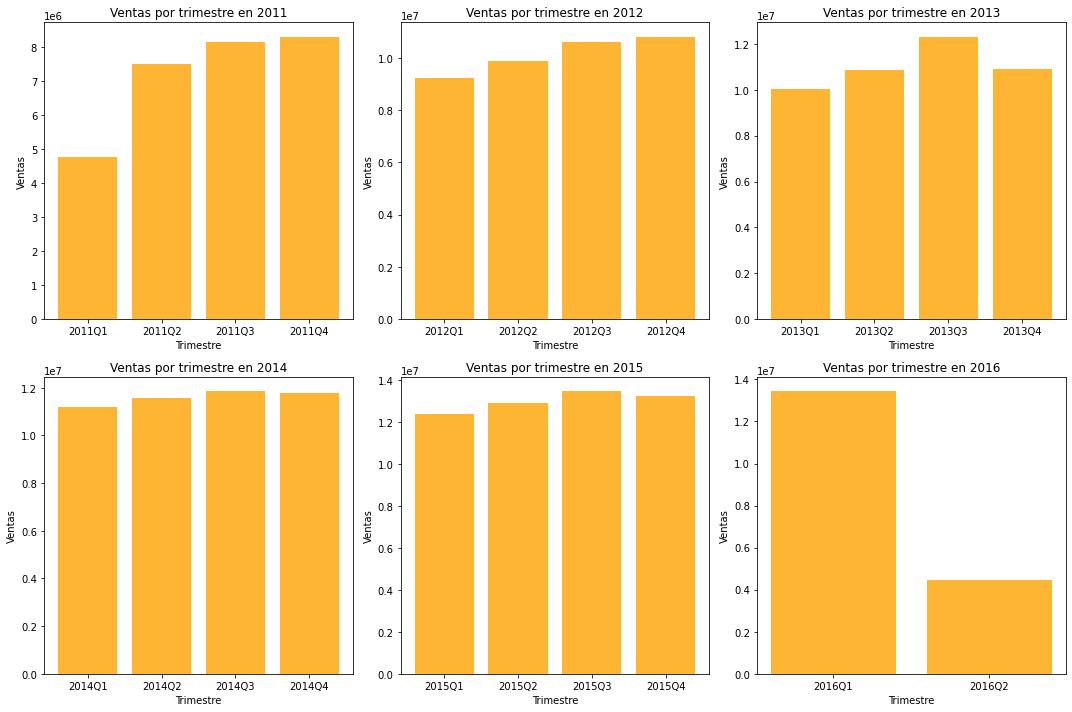

In [120]:
years = sorted(df.index.year.unique())

# Definimos el número de columnas para los subplots
num_plots = len(years)

# Calculamos el número de filas y columnas para los subplots
num_cols = 3
num_rows = -(-num_plots // num_cols) 

# Creamos la figura y los subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Iteramos sobre cada año y trazamos el gráfico correspondiente en el subplot adecuado
for i, year in enumerate(years):
    df_year = df[df.index.year == year]
    sales_per_quarter = df_year.resample('Q')['total_sales'].sum()

    sales_per_quarter.index = sales_per_quarter.index.to_period('Q')

    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    ax.bar(sales_per_quarter.index.astype(str), sales_per_quarter.values, color="#ffb534")
    ax.set_xlabel('Trimestre')
    ax.set_ylabel('Ventas')
    ax.set_title(f'Ventas por trimestre en {year}')

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


Comprobamos la distribución por mes.

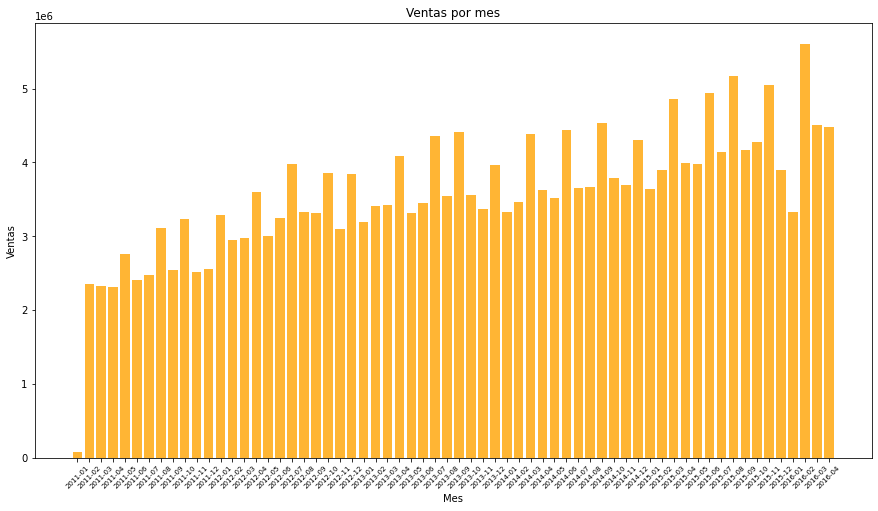

In [58]:
sales_per_month = df.resample('M')['total_sales'].sum()
sales_per_month.index = sales_per_month.index.to_period('M')

plt.figure(figsize=(15,8))
plt.bar(sales_per_month.index.astype(str), sales_per_month.values, color="#ffb534")
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Ventas por mes')
plt.xticks(rotation=45, fontsize=7)
plt.show()

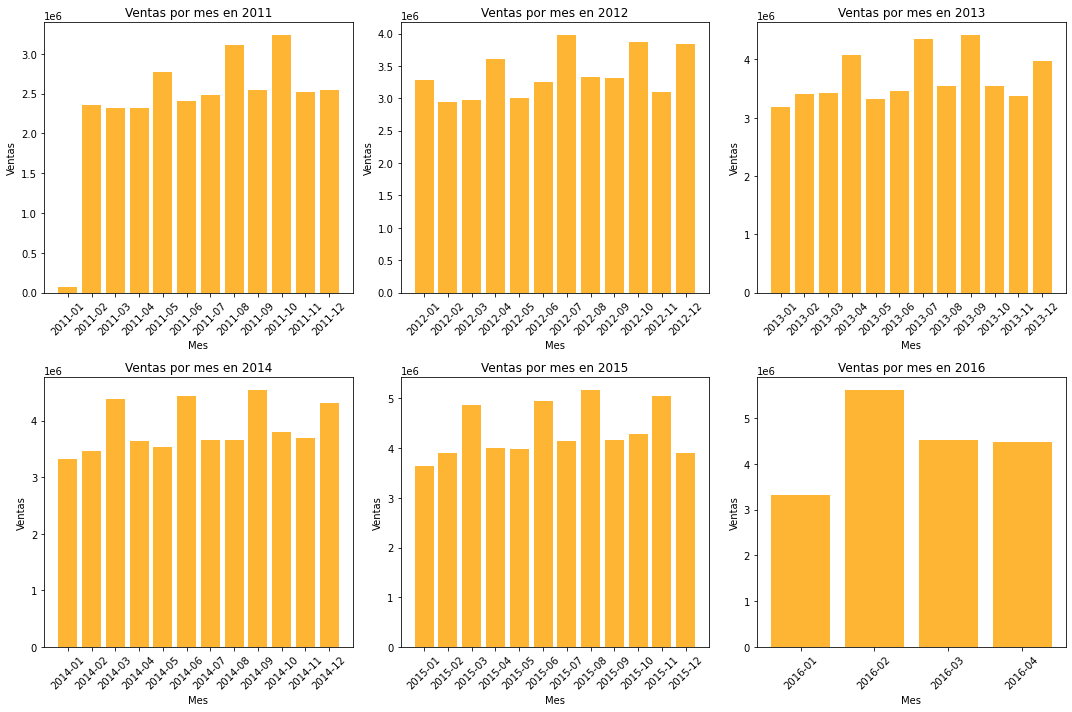

In [121]:
def plot_sales_per_month(df):
    years = sorted(df.index.year.unique())  

    # Definimos el número de columnas para los subplots
    num_plots = len(years)

    # Calculamos el número de filas y columnas para los subplots
    num_cols = 3
    num_rows = -(-num_plots // num_cols) 

    # Creamos la figura y los subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

    # Iteramos sobre cada año y trazamos el gráfico correspondiente en el subplot adecuado
    for i, year in enumerate(years):
        df_year = df[df.index.year == year]
        sales_per_month = df_year.resample('M')['total_sales'].sum()
        sales_per_month.index = sales_per_month.index.to_period('M')

        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]

        ax.bar(sales_per_month.index.astype(str), sales_per_month.values, color="#ffb534")
        ax.set_xlabel('Mes')
        ax.set_ylabel('Ventas')
        ax.set_title(f'Ventas por mes en {year}')
        ax.tick_params(axis='x', rotation=45)

    # Eliminamos subplots no utilizados
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

plot_sales_per_month(df)


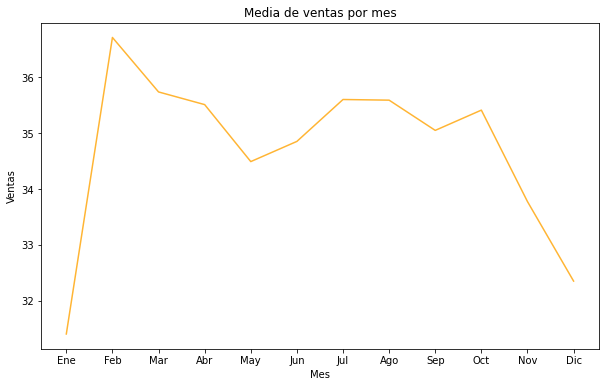

In [60]:
sales_per_month = df.groupby(df.index.month)['total_sales'].mean()

months = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

plt.figure(figsize=(10,6))
plt.plot(months, sales_per_month.values, color="#ffb534")
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Media de ventas por mes')
plt.show()

In [61]:
sales_per_month_sum = df.groupby(df.index.month)['total_sales'].sum()
sales_per_month_mean = df.groupby(df.index.month)['total_sales'].mean()
sales_per_month_mode = df.groupby(df.index.month)['total_sales'].apply(lambda x: x.mode()[0])

print("Suma de ventas por mes:")
for month, total in zip(months, sales_per_month_sum):
    print(f"{month}: {total}")

print("\nMedia de ventas por mes:")
for month, mean in zip(months, sales_per_month_mean):
    print(f"{month}: {mean}")

print("\nModa de ventas por mes:")
for month, mode in zip(months, sales_per_month_mode):
    print(f"{month}: {mode}")

Suma de ventas por mes:
Ene: 16830338.721903235
Feb: 21687288.652202882
Mar: 22484969.941803385
Abr: 22109031.471103236
May: 16599900.620103043
Jun: 18482715.894701675
Jul: 18593845.56710188
Ago: 18815447.67570147
Sep: 18980640.050001446
Oct: 18719887.5877018
Nov: 17726623.37350251
Dic: 18577959.378802422

Media de ventas por mes:
Ene: 31.4084995733965
Feb: 36.70796954026005
Mar: 35.734387447738705
Abr: 35.507903257367666
May: 34.48950166548524
Jun: 34.850231819359166
Jul: 35.59925248818112
Ago: 35.587463213673786
Sep: 35.04724210771484
Oct: 35.40933319153462
Nov: 33.77483985523879
Dic: 32.35355166914672

Moda de ventas por mes:
Ene: 0.0
Feb: 0.0
Mar: 0.0
Abr: 0.0
May: 0.0
Jun: 0.0
Jul: 0.0
Ago: 0.0
Sep: 0.0
Oct: 0.0
Nov: 0.0
Dic: 0.0


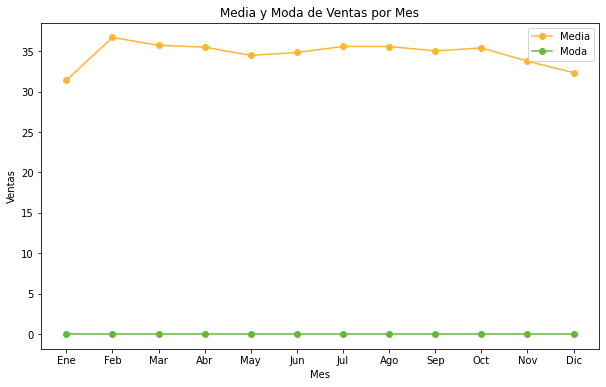

In [62]:
sales_per_month_mean = df.groupby(df.index.month)['total_sales'].mean()
sales_per_month_mode = df.groupby(df.index.month)['total_sales'].apply(lambda x: x.mode()[0])

plt.figure(figsize=(10,6))

plt.plot(months, sales_per_month_mean, marker='o', label='Media', color="#ffb534")
plt.plot(months, sales_per_month_mode, marker='o', label='Moda', color="#65b741")

plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Media y Moda de Ventas por Mes')
plt.legend()
plt.show()

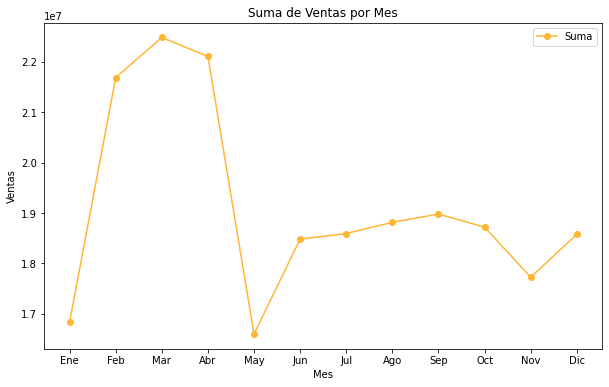

In [63]:
sales_per_month_sum = df.groupby(df.index.month)['total_sales'].sum()

plt.figure(figsize=(10,6))

plt.plot(months, sales_per_month_sum, marker='o', label='Suma', color="#ffb534")

plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Suma de Ventas por Mes')
plt.legend()
plt.show()

Filtramos el DataFrame para excluir el año 2016 ya que no tenemos datos de todos los meses del año.

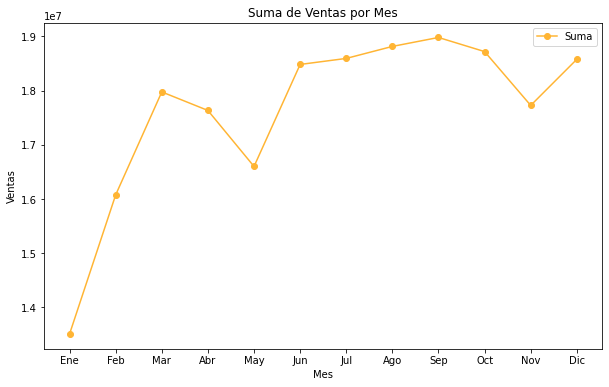

In [64]:
df_filtered = df[df.index.year != 2016]

sales_per_month_sum = df_filtered.groupby(df_filtered.index.month)['total_sales'].sum()

plt.figure(figsize=(10,6))

plt.plot(months, sales_per_month_sum, marker='o', label='Suma', color="#ffb534")

plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Suma de Ventas por Mes')
plt.legend()
plt.show()

### Holidays

In [73]:
total_sales = df.groupby('is_holidays')['total_sales'].sum()
print(total_sales)

is_holidays
0    1.735888e+08
1    5.601987e+07
Name: total_sales, dtype: float64


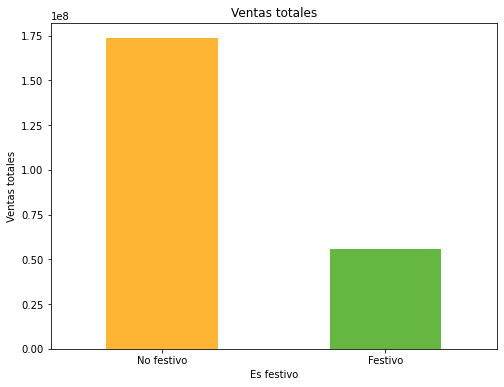

In [74]:
total_sales = df.groupby('is_holidays')['total_sales'].sum()

total_sales.plot(kind='bar', figsize=(8,6), color=["#ffb534", "#65b741"])
plt.xlabel('Es festivo')
plt.ylabel('Ventas totales')
plt.title('Ventas totales')
plt.xticks([0,1], ['No festivo', 'Festivo'], rotation=0)
plt.show()

Vemos que en los festivos también se producen ventas.

In [76]:
mean_sales = df.groupby('is_holidays')['total_sales'].mean()
print(mean_sales)

is_holidays
0    35.179715
1    33.421351
Name: total_sales, dtype: float64


No vemos una correlación relevante, los días festivos no hay más ventas.

### Units sold

In [77]:
correlacion = df['units_sold'].corr(df['total_sales'])
print(f'La correlación entre units_sold y total_sales es {correlacion}')

La correlación entre units_sold y total_sales es 0.708038518607399


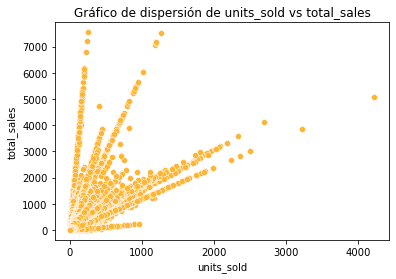

In [80]:
sns.scatterplot(x='units_sold', y='total_sales', data=df, color="#ffb534")
plt.xlabel('units_sold')
plt.ylabel('total_sales')
plt.title('Gráfico de dispersión de units_sold vs total_sales')
plt.show()

### Sell prices

In [81]:
correlacion = df['sell_price'].corr(df['total_sales'])
print(f'La correlación entre sell_price y total_sales es {correlacion}')

La correlación entre sell_price y total_sales es 0.10570773947995371


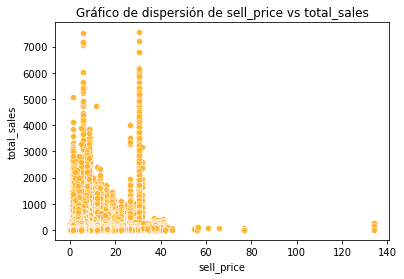

In [83]:
sns.scatterplot(x='sell_price', y='total_sales', data=df, color="#ffb534")
plt.xlabel('sell_price')
plt.ylabel('total_sales')
plt.title('Gráfico de dispersión de sell_price vs total_sales')
plt.show()

### Items

In [84]:
ventas_por_item = df.groupby('item')['total_sales'].sum()
print(ventas_por_item)

item
ACCESORIES_1_001      44563.8844
ACCESORIES_1_002      26644.7146
ACCESORIES_1_003       5533.7310
ACCESORIES_1_004     234221.1662
ACCESORIES_1_005      55318.0383
                        ...     
SUPERMARKET_3_823     50550.0120
SUPERMARKET_3_824     25376.9400
SUPERMARKET_3_825     65517.8520
SUPERMARKET_3_826     18616.8480
SUPERMARKET_3_827     13456.8000
Name: total_sales, Length: 3049, dtype: float64


Sacamos el top 10 de productos con más ventas y los 10 menos vendidos.

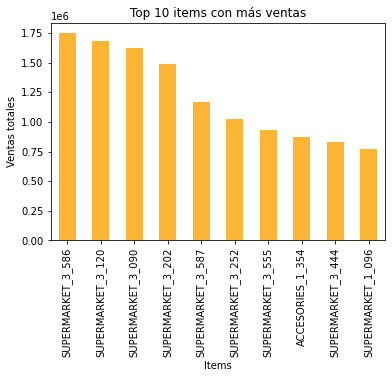

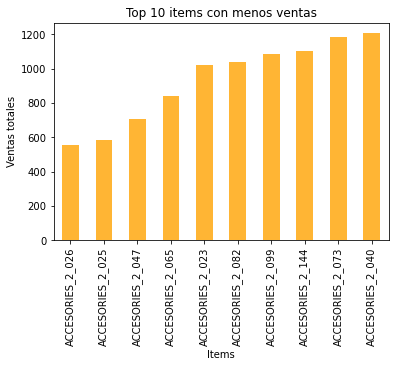

In [85]:
top_10_items = ventas_por_item.nlargest(10)
bottom_10_items = ventas_por_item.nsmallest(10)

top_10_items.plot(kind='bar', color="#ffb534")
plt.xlabel('Items')
plt.ylabel('Ventas totales')
plt.title('Top 10 items con más ventas')
plt.show()

bottom_10_items.plot(kind='bar', color="#ffb534")
plt.xlabel('Items')
plt.ylabel('Ventas totales')
plt.title('Top 10 items con menos ventas')
plt.show()

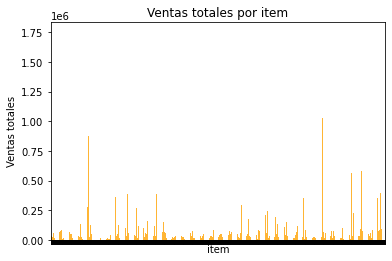

In [86]:
ventas_por_item.plot(kind='bar', color="#ffb534")
plt.ylabel('Ventas totales')
plt.title('Ventas totales por item')
plt.xticks(visible=False)
plt.show()

### Category

In [87]:
ventas_por_categoria = df.groupby('category')['total_sales'].sum()
print(ventas_por_categoria)

category
ACCESORIES       3.013996e+07
HOME_&_GARDEN    6.950307e+07
SUPERMARKET      1.299656e+08
Name: total_sales, dtype: float64


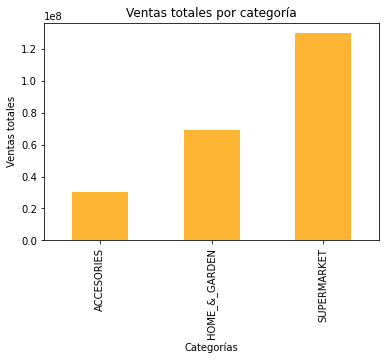

In [88]:
ventas_por_categoria.plot(kind='bar', color="#ffb534")
plt.xlabel('Categorías')
plt.ylabel('Ventas totales')
plt.title('Ventas totales por categoría')
plt.show()

### Departments

In [89]:
ventas_por_departamento = df.groupby('department')['total_sales'].sum()
print(ventas_por_departamento)

department
ACCESORIES_1       2.858692e+07
ACCESORIES_2       1.553035e+06
HOME_&_GARDEN_1    5.124741e+07
HOME_&_GARDEN_2    1.825565e+07
SUPERMARKET_1      1.541994e+07
SUPERMARKET_2      2.981893e+07
SUPERMARKET_3      8.472675e+07
Name: total_sales, dtype: float64


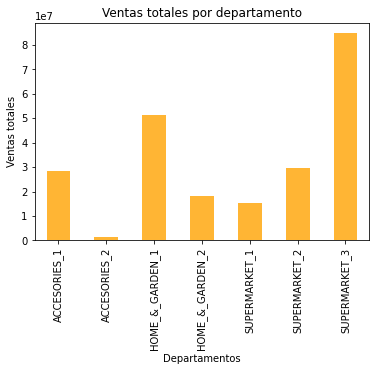

In [90]:
ventas_por_departamento.plot(kind='bar', color="#ffb534")
plt.xlabel('Departamentos')
plt.ylabel('Ventas totales')
plt.title('Ventas totales por departamento')
plt.show()

### Stores

In [91]:
ventas_por_tienda = df.groupby('stores')['total_sales'].sum()
print(ventas_por_tienda)

stores
Back_Bay(BOS_3)             2.181127e+07
Brooklyn(NYC_4)             1.495885e+07
Greenwich_Village(NYC_1)    2.757273e+07
Harlem(NYC_2)               2.135534e+07
Midtown_Village(PHI_1)      1.811085e+07
Queen_Village(PHI_3)        2.063028e+07
Roxbury(BOS_2)              2.512650e+07
South_End(BOS_1)            1.923361e+07
Tribeca(NYC_3)              3.928694e+07
Yorktown(PHI_2)             2.152227e+07
Name: total_sales, dtype: float64


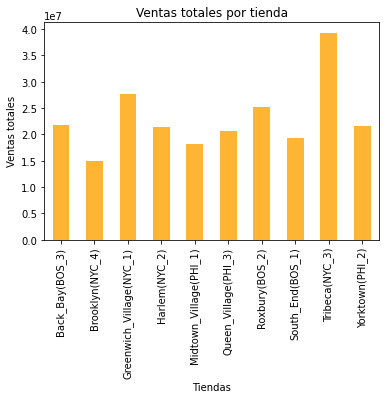

In [92]:
ventas_por_tienda.plot(kind='bar',color="#ffb534" )
plt.xlabel('Tiendas')
plt.ylabel('Ventas totales')
plt.title('Ventas totales por tienda')
plt.show()

### Region

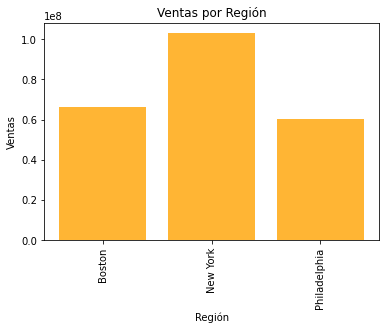

In [124]:
sales_per_region = df.groupby('region')['total_sales'].sum()

plt.bar(sales_per_region.index, sales_per_region.values,  color= "#ffb534")
plt.xlabel('Región')
plt.ylabel('Ventas')
plt.title('Ventas por Región')
plt.xticks(rotation=90)  
plt.show()

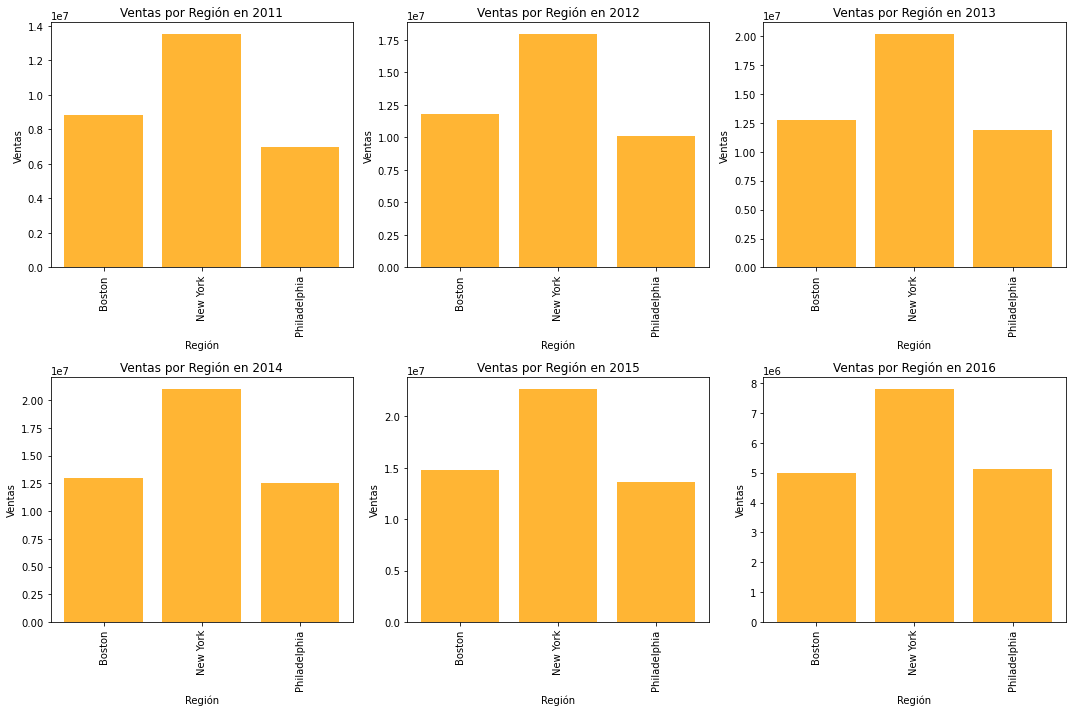

In [128]:
num_plots = len(years)

# Calculamos el número de filas y columnas para los subplots
num_cols = 3
num_rows = -(-num_plots // num_cols) 

# Creamos la figura y los subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Iteramos sobre cada año y trazamos el gráfico correspondiente en el subplot adecuado
for i, year in enumerate(years):
    # Filtramos el DataFrame por el año actual
    df_year = df[df['year'] == year]
    
    # Calculamos las ventas por región para el año actual
    sales_per_region = df_year.groupby('region')['total_sales'].sum()
    
    # Calculamos la posición del subplot actual
    row = i // num_cols
    col = i % num_cols
    
    # Seleccionamos el eje actual
    ax = axes[row, col] if num_rows > 1 else axes[col]
    
    # Creamos el gráfico de barras para el año actual
    ax.bar(sales_per_region.index, sales_per_region.values, color="#ffb534")
    ax.set_xlabel('Región')
    ax.set_ylabel('Ventas')
    ax.set_title(f'Ventas por Región en {year}')
    ax.tick_params(axis='x', rotation=90)

# Eliminamos subplots no utilizados
for i in range(num_plots, num_rows * num_cols):
    if num_rows > 1:
        fig.delaxes(axes.flatten()[i])
    else:
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


Concluímos que New York es siempre en todos los años la region con más ventas.

## Relaciones entre variables

Observamos la cantidad de festivos por año.

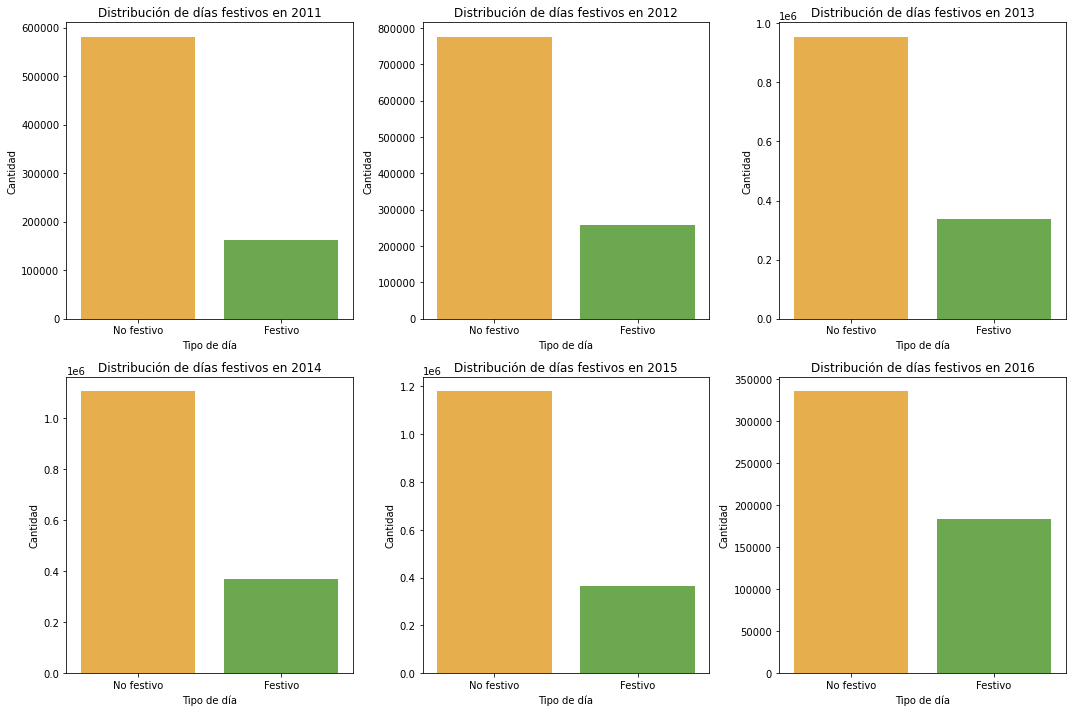

In [129]:
# Creamos un DataFrame con la distribución de días festivos por año
holiday_counts = df.groupby(['year', 'is_holidays']).size().unstack(fill_value=0)

years = sorted(df['year'].unique())

# Definimos el número de columnas para los subplots
num_cols = 3

# Calculamos el número de filas para los subplots
num_rows = -(-len(years) // num_cols)

# Creamos la figura y los subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Iteramos sobre cada año y trazamos el gráfico correspondiente en el subplot adecuado
for i, year in enumerate(years):
    # Verificamos si hay datos para el año actual
    if year in holiday_counts.index:
        # Calculamos la posición del subplot actual
        row = i // num_cols
        col = i % num_cols
        
        # Seleccionamos el eje actual
        ax = axes[row, col] if num_rows > 1 else axes[col]
        
        # Trazamos el gráfico de barras para el año actual
        sns.barplot(data=holiday_counts.loc[[year]], palette=["#ffb534", "#65b741"], ax=ax)
        ax.set_xlabel('Tipo de día')
        ax.set_ylabel('Cantidad')
        ax.set_title(f'Distribución de días festivos en {year}')
        ax.set_xticks([0, 1])
        ax.set_xticklabels(['No festivo', 'Festivo'], rotation=0)
    else:
        print(f'No hay datos para el año {year}')

# Eliminamos subplots no utilizados
for i in range(len(years), num_rows * num_cols):
    if num_rows > 1:
        fig.delaxes(axes.flatten()[i])
    else:
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


También vemos si varían las categorías más vendidas a lo largo de los años.

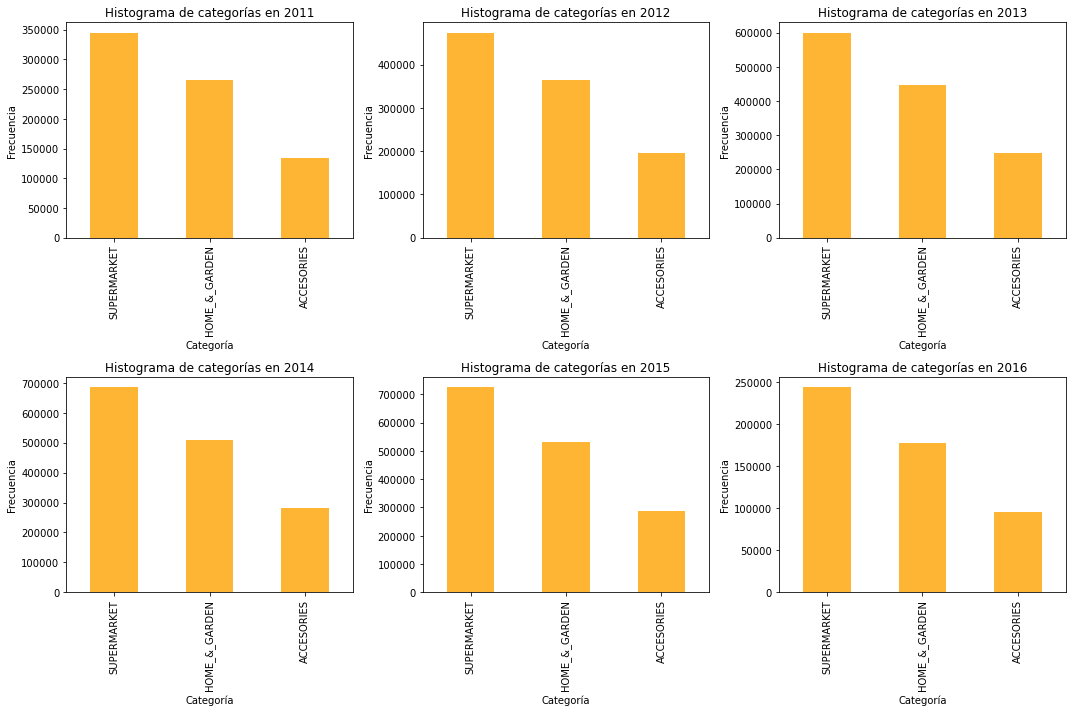

In [130]:
years = sorted(df['year'].unique())

# Definimos el número de columnas para los subplots
num_cols = 3

# Calculamos el número de filas para los subplots
num_rows = -(-len(years) // num_cols)

# Creamos la figura y los subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Iteramos sobre cada año y trazamos el histograma correspondiente en el subplot adecuado
for i, year in enumerate(years):
    # Filtramos el DataFrame por el año actual
    df_year = df[df['year'] == year]
    
    # Calculamos la posición del subplot actual
    row = i // num_cols
    col = i % num_cols
    
    # Seleccionamos el eje actual
    ax = axes[row, col] if num_rows > 1 else axes[col]
    
    # Trazamos el histograma de frecuencia de categorías para el año actual
    df_year['category'].value_counts().plot(kind='bar', color="#ffb534", ax=ax)
    ax.set_title(f'Histograma de categorías en {year}')
    ax.set_xlabel('Categoría')
    ax.set_ylabel('Frecuencia')

# Eliminamos subplots no utilizados
for i in range(len(years), num_rows * num_cols):
    if num_rows > 1:
        fig.delaxes(axes.flatten()[i])
    else:
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


Repetimos el mismo proceso, pero ahora por departamentos.

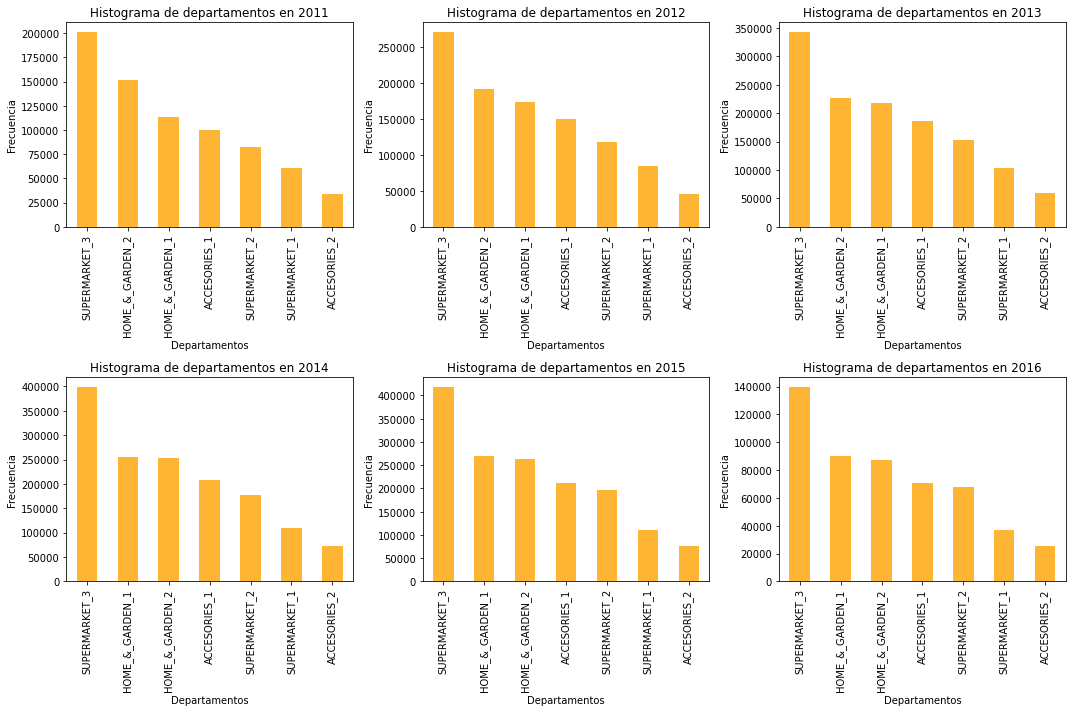

In [132]:
years = sorted(df['year'].unique())

# Definimos el número de columnas para los subplots
num_cols = 3

# Calculamos el número de filas para los subplots
num_rows = -(-len(years) // num_cols)

# Creamos la figura y los subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Iteramos sobre cada año y trazamos el histograma correspondiente en el subplot adecuado
for i, year in enumerate(years):
    df_year = df[df['year'] == year]
    
    # Calculamos la posición del subplot actual
    row = i // num_cols
    col = i % num_cols
    
    # Seleccionamos el eje actual
    ax = axes[row, col] if num_rows > 1 else axes[col]
    
    # Trazamos el histograma de frecuencia de departamentos para el año actual
    df_year['department'].value_counts().plot(kind='bar', color="#ffb534", ax=ax)
    ax.set_title(f'Histograma de departamentos en {year}')
    ax.set_xlabel('Departamentos')
    ax.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


In [108]:
precio_promedio_por_categoria = df.groupby('category')['sell_price'].mean()
print("Precio promedio de venta por categoría:\n", precio_promedio_por_categoria)

Precio promedio de venta por categoría:
 category
ACCESORIES       7.086660
HOME_&_GARDEN    6.831545
SUPERMARKET      3.896713
Name: sell_price, dtype: float64


Agrupamos los productos por su precio y visualizamos la cantidad de ventas según este.

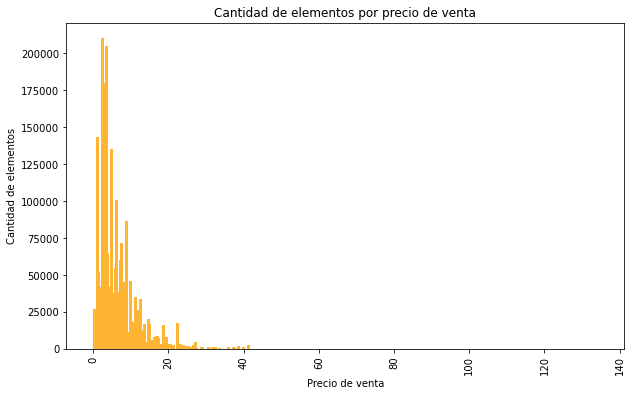

In [109]:
items_per_price = df.groupby('sell_price')['item'].count()

plt.figure(figsize=(10,6))

plt.bar(items_per_price.index, items_per_price.values, color="#ffb534")
plt.xlabel('Precio de venta')
plt.ylabel('Cantidad de elementos')
plt.title('Cantidad de elementos por precio de venta')
plt.xticks(rotation=90)  
plt.show()

Pintamos ahora los 10 productos que mayor beneficio han producido por región.

In [142]:
def plot_top10_items_by_region(df):
    df_grouped = df.groupby(['region', 'item']).sum('total_sales').reset_index()

    regions = df['region'].unique()

    for region in regions:
        df_region = df_grouped[df_grouped['region'] == region]

        df_top10 = df_region.nlargest(10, 'total_sales')

        fig = px.bar(df_top10, x='item', y='total_sales', title=f'Top 10 productos en {region}', color_discrete_sequence=["#ffb534"])
        fig.show()

plot_top10_items_by_region(df)

Concluímos que *supermarket* siempre prevalece en las tres regiones.

Observamos ahora los 10 productos más vendidos por región.

In [141]:
def plot_top10_items_by_region(df):
    df_grouped = df.groupby(['region', 'item']).sum('total_sales').reset_index()

    regions = df['region'].unique()

    for region in regions:
        df_region = df_grouped[df_grouped['region'] == region]

        df_top10 = df_region.nlargest(10, 'units_sold')

        fig = px.bar(df_top10, x='item', y='units_sold', title=f'Top 10 productos vendidos en {region}', color_discrete_sequence=["#ffb534"])
        fig.show()

plot_top10_items_by_region(df)